In [2]:
import sys
sys.path.append("..\\methods")

In [3]:
from estnltk import Text

import json
from estnltk.converters import json_to_text

from noun_phrase_extraction import create_df
from POS_sequence import get_POS_sequence
from graph_methods import *

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

import pandas as pd
import numpy as np

In [4]:
with open('test_text.json', 'r') as f:
    content = json.load( f )

In [5]:
test_text = json_to_text( content )

In [6]:
test_text

Text(text='RAIVO PALMARU , “ Sõnumileht ”\n\nRublatehing oli seotud kütuse salakaubandusega .\nSellisele järeldusele jõudsid naftaäri kriminaalasja uurimise käigus Läti juurdlusorganid .\nRootsis registreeritud firma sildi all tegutsenud grupp tellis Eestis rahareformi ajal kokku korjatud rublade veoks lennukid ja vähemalt 500 miljoni rubla müügi korraldas selle grupiga seotud Eesti ärimees .\nSaadud raha on varjul Küprose pangas .\n\nPank lõhkise küna ees\n\nEesti Panga ( EP ) andmetel vahetati rahareformi käigus kroonide vastu  2 259 669 091  rubla .\nLisaks sellele oli panga varahoidlates veel  4 396 739  rubla .\n\nRahareformi esimesel päeval , 20. juunil 1992 , sõlmisid Eesti Vabariigi valitsus ja Vene Föderatsiooni valitsus omavahelise kokkuleppe vastastikustest kohustustest seoses Eesti Vabariigi rahvusliku valuuta käibelevõtmisega .\nSellele kirjutasid alla Eesti peaminister Tiit Vähi ja Vene valitsuse aseesimees Aleksandr Sohhin .\n\nKokkuleppe 5. artikkel nägi ette , et Eesti pool annab kõik rahavahetuse käigus kokku kogutud rublad kuu aja jooksul üle Venemaa keskpangale .\nTäpsustamata jäid aga raha üleandmise tingimused .\n\nSee kokkulepe jäi täitmata nii Venemaa kui ka Eesti poolt .\nNõnda jäi umbes 70 tonni rublasid Eesti Panga varahoidlasse .\nKokkuleppele viidates nõudsid venelased raha tagasi , samas aga teatasid , et nad ei kanna vastutust Eesti Hoiupanga ( NSVLi Hoiupanga EVP ) hoiustajate ees .\nKa nende hoiuste kogusumma moodustas umbes kaks miljardit rubla ning EP oli sunnitud võtma vastavad garantiikohustused endale .\n\nBo Kragh soovitas rublad müüa\n\nEsimest korda arutas Eesti Panga nõukogu kujunenud olukorda 7. oktoobril 1992.\nVastavad kirjalikud ettepanekud esitas panga tollane asepresident Bo Kragh .\nTa leidis , et EP garantiikohustuste ulatuses tuleks teha tasaarvestus .\nÜhtlasi soovitas Kragh rublad müüa Eesti valuutaoksjonitel , anda Eesti Kütusele rublakrediiti naftatoodete ostmiseks või anda osa rublasid remigratsioonifondile .\n\nEP nõukogu aktsepteeris asepresidendi soovitusi ja tegi panga presidendile Siim Kallasele ülesandeks pidada rublade saatuse küsimuses nõu presidendi , Riigikogu esimehe , peaministri ja välisministriga .\n\n1992. aasta 28. oktoobril arutas Eesti Panga nõukogu asja veel kord ja otsustas , et kui läbirääkimised Moskvas külmutatud Eesti Vabariigi aktivate tagasisaamise üle ei anna 15. novembriks tulemusi , volitab panga nõukogu Siim Kallast teatama valitsusele panga valmisolekust kuulutada välja tasaarvestus .\n\nOma teeneid pakkusid Silvesja Apananski\n\nPärast seda nähti Siim Kallast sageli Toompeal .\n4. detsembril 1992 andis rahareformikomitee välja dekreedi nr. 40.\nSelles otsustati vabastada Eesti Panga ja kommertspankade hoidlad sularaharubladest , realiseerida rublad ja säilitada nende realiseerimisel konfidentsiaalsus .\nDekreedile kirjutas alla peaminister Mart Laar .\n\nSamal päeval kirjutasid peaminister ja Eesti Panga president alla protokollile , milles märgitakse : “ Eesti Pank ja Eesti Vabariigi valitsus leppisid kokku , et seoses ruumipuudusega Eesti Panga varahoidlates antakse rahareformi käigus elanikelt ja firmadelt kokku kogutud sularaharublad vastutavale hoiule Eesti Vabariigi valitsuse varahoidlatesse . ”\n\nTeatavasti ei ole valitsusel mingeid varahoidlaid .\n\nPärast seda asus rublamüüki korraldama peaministri nõunik Tiit Pruuli .\nTõsi , mõningaid samme oli astutud juba enne 4. detsembri dekreeti .\n24. novembril käis peaministri jutul tuntud ärinaine Tiiu Silves , kellega räägiti rublade müügist ja lepiti kokku , et vajaduse korral võtab Silvesega ühendust Pruuli .\n\nTeist korda kohtus Pruuli Silvesega 7. detsembril 1992.\nKuid peaministri nõunikule Silves ei meeldinud ja ta väljendas seda ka valitsuse istungil .\n\nEnam-vähem samal ajal pakkus ennast vahendajaks Leonid Apananski .\nEnt temale vastati tollase standardfraasiga : rublad on alles ja vastavalt lepingule antakse need üle Vene poolele .\n\nPanus maagidele\n\nSeejärel asus Tiit P

In [7]:
for text_id, text in enumerate([test_text]):
    df = create_df(text_id, text)

In [8]:
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0
...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0


### POS-märgendite järjestused

Lisame kõik sõnaliigijärjestused DataFrame-i:

In [9]:
all_pos = []
for phrase in df['phrase']:
    all_pos.append(get_POS_sequence(phrase))
df.insert(len(df.columns), 'pos_sequence', all_pos)

In [10]:
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K
...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0,S-V-D-S-Z-Z-A-S-S-V-(V|A)-A-V-Z
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0,S-V-Y-S-(V|A)-S-Z-Z


### Süntaksipuu graafi esitus

In [11]:
test_phrase = df['phrase'][4]

In [12]:
test_phrase.stanza_syntax

Layer(name='stanza_syntax', attributes=('id', 'lemma', 'upostag', 'xpostag', 'feats', 'head', 'deprel', 'deps', 'misc', 'parent_span', 'children'), spans=SL[Span('Rootsis', [{'id': 1, 'lemma': 'Rootsi', 'upostag': 'H', 'xpostag': 'H', 'feats': OrderedDict([('sg', 'sg'), ('in', 'in')]), 'head': 2, 'deprel': 'obl', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': ()}]),
Span('registreeritud', [{'id': 2, 'lemma': 'registreeritud', 'upostag': 'A', 'xpostag': 'A', 'feats': OrderedDict([('pl', 'pl'), ('n', 'n')]), 'head': 3, 'deprel': 'acl', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': <class 'tuple'>}]),
Span('firma', [{'id': 3, 'lemma': 'firma', 'upostag': 'S', 'xpostag': 'S', 'feats': OrderedDict([('sg', 'sg'), ('g', 'g')]), 'head': 4, 'deprel': 'nmod', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': <class 'tuple'>}]),
Span('sildi', [{'id': 4, 'lemma': 'silt', 'upostag': 'S', 'xpostag': 'S', 'feats': OrderedDict([('sg', 'sg'), ('g', 'g')]), 'head': 0, 'deprel': 'root', 'deps': '_', 'misc': '_', 'parent_span': None, 'children': <class 'tuple'>}]),
Span('all', [{'id': 5, 'lemma': 'all', 'upostag': 'K', 'xpostag': 'K', 'feats': OrderedDict(), 'head': 4, 'deprel': 'case', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': ()}])])

Graafi koostamisel on võetud eeskuju siit: https://github.com/estnltk/syntax_experiments/blob/subcat/obl_data_experiments/data_helpers/syntax_graph.py

In [13]:
test_graph = create_graph(test_phrase)

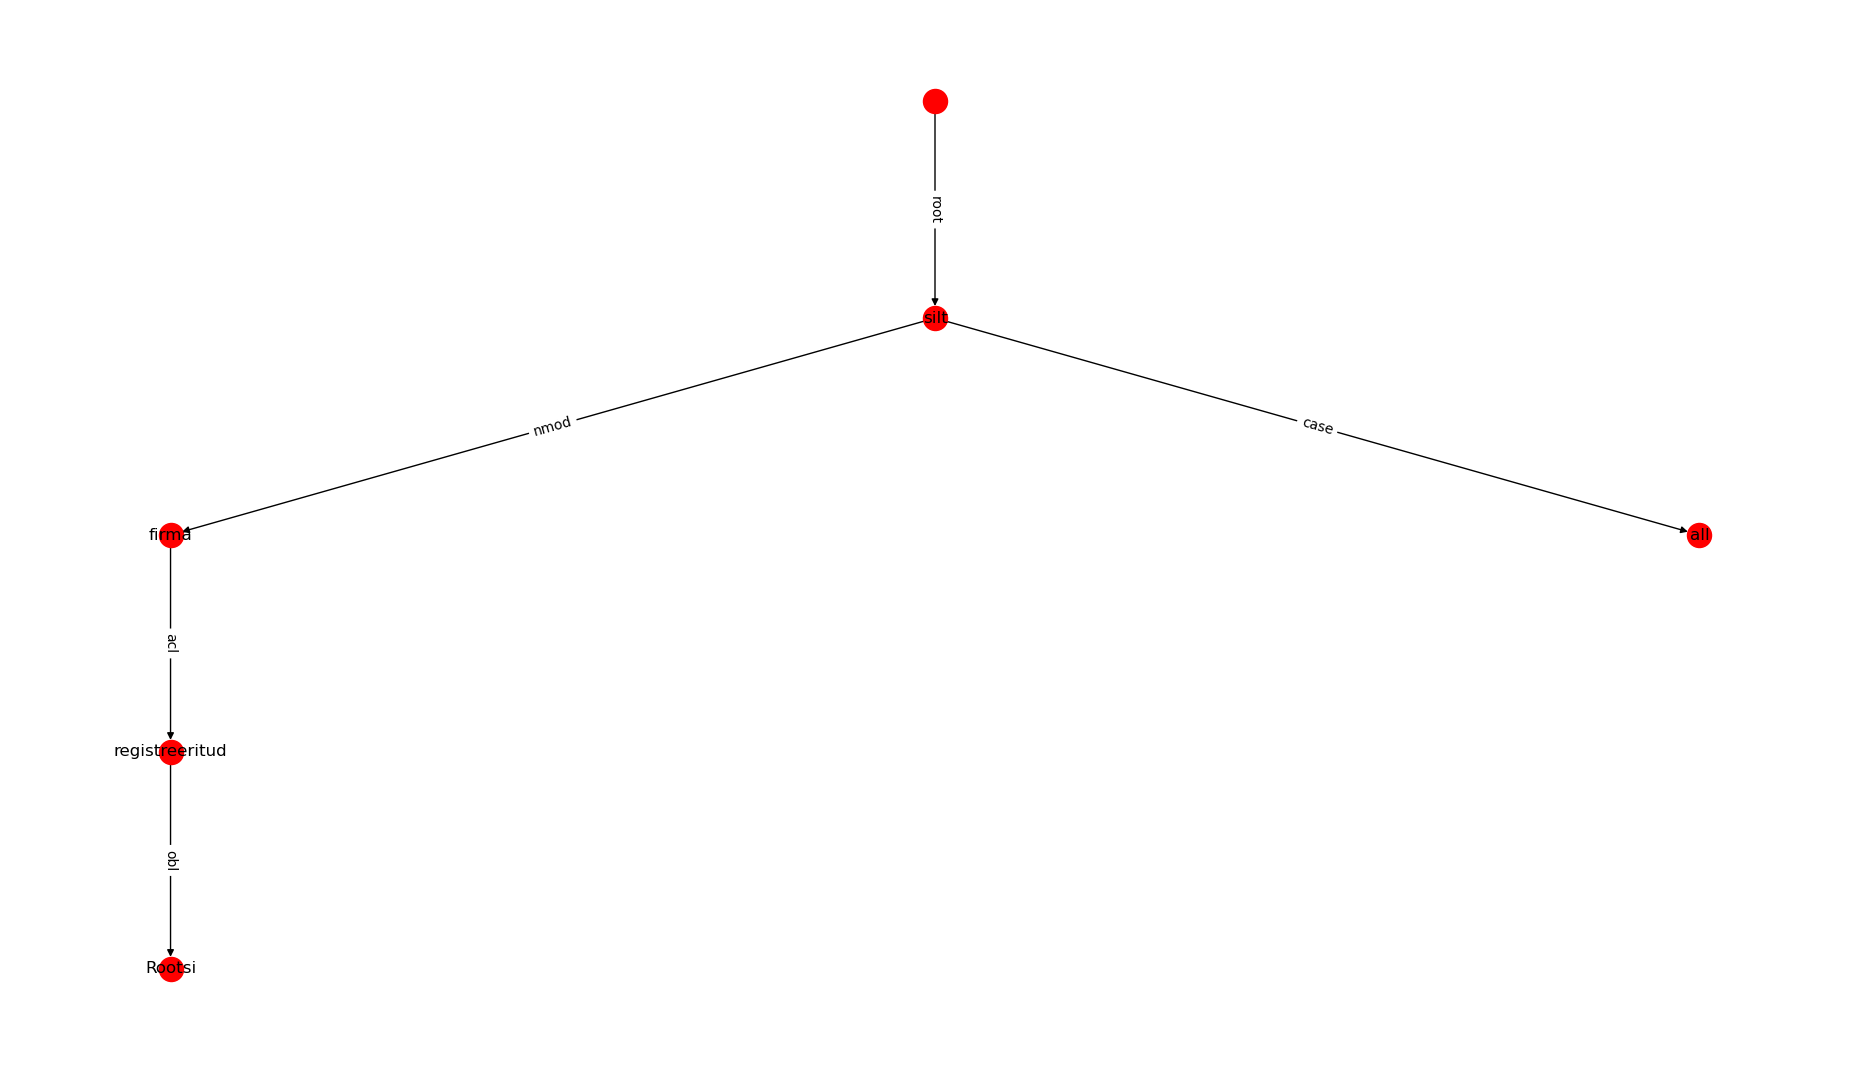

<Figure size 1850x1050 with 0 Axes>

In [14]:
# Visualiseerimine
draw_graph(test_graph, 'lemma')

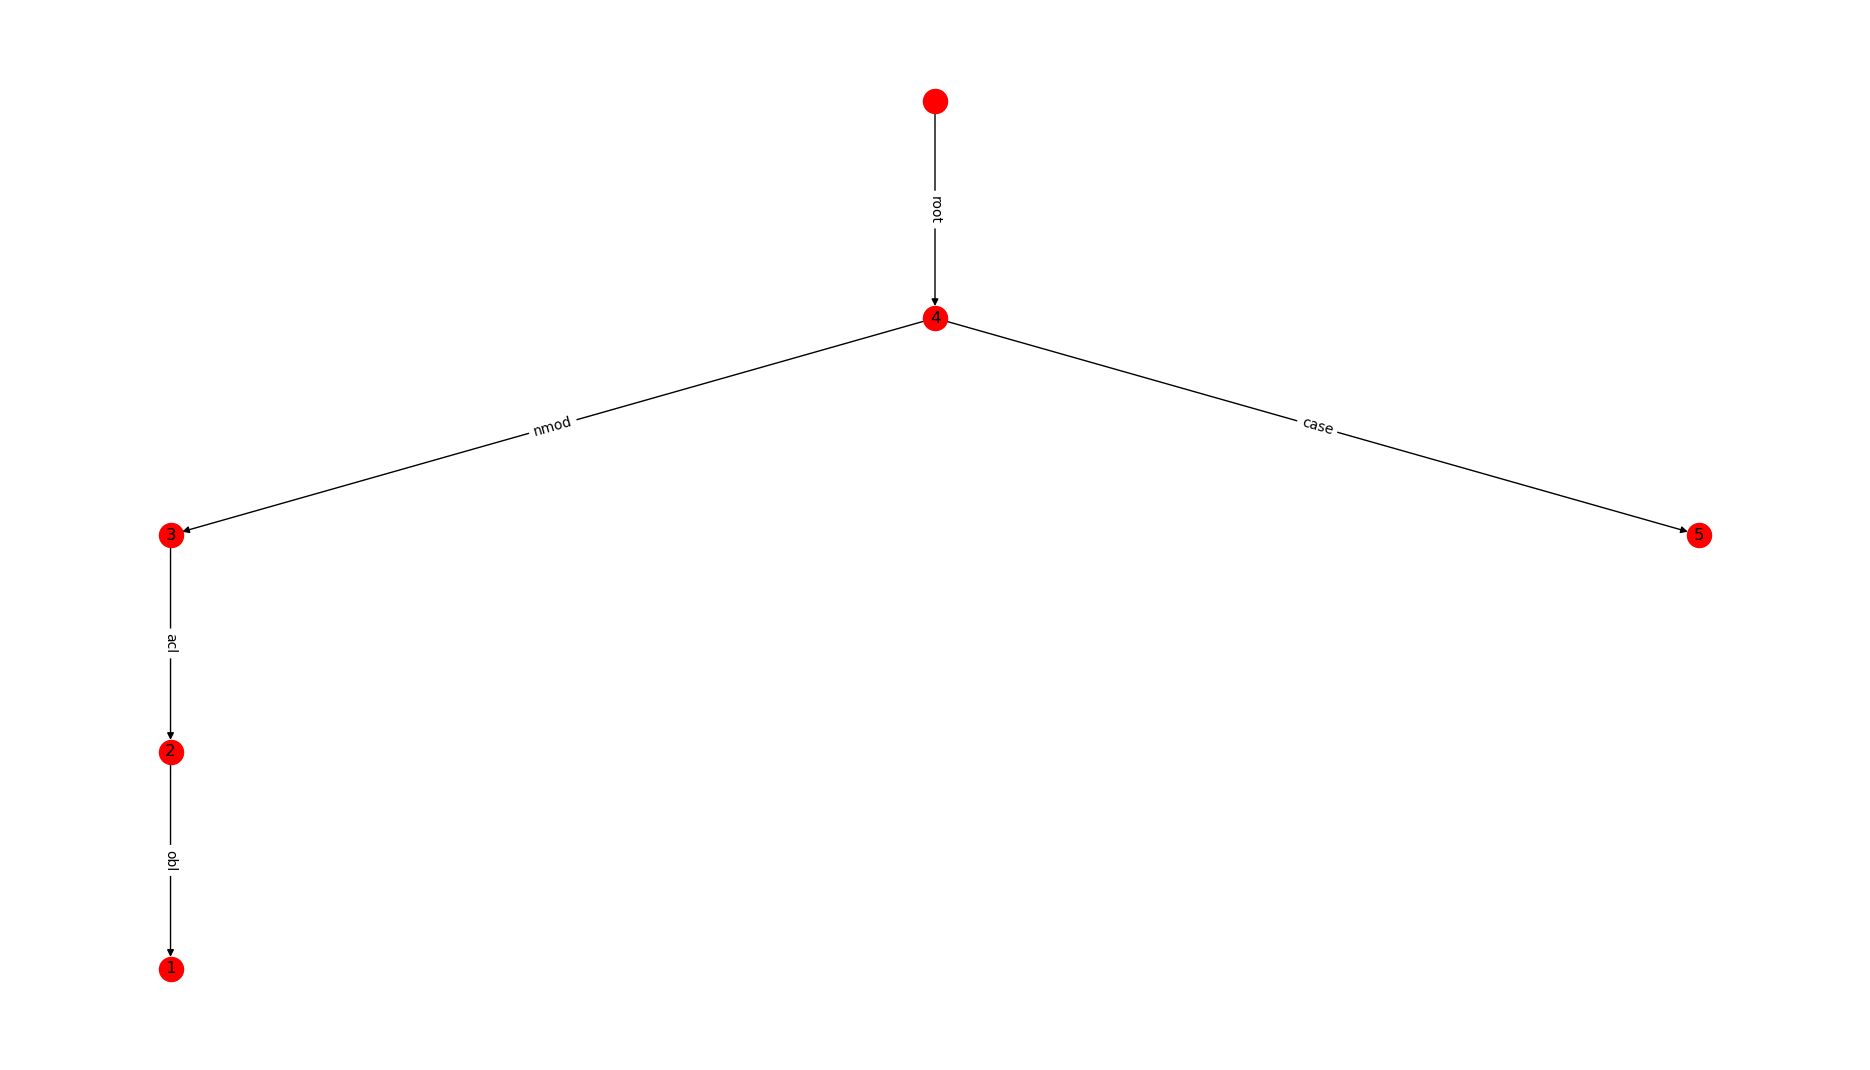

<Figure size 1850x1050 with 0 Axes>

In [15]:
draw_graph(test_graph, 'id')

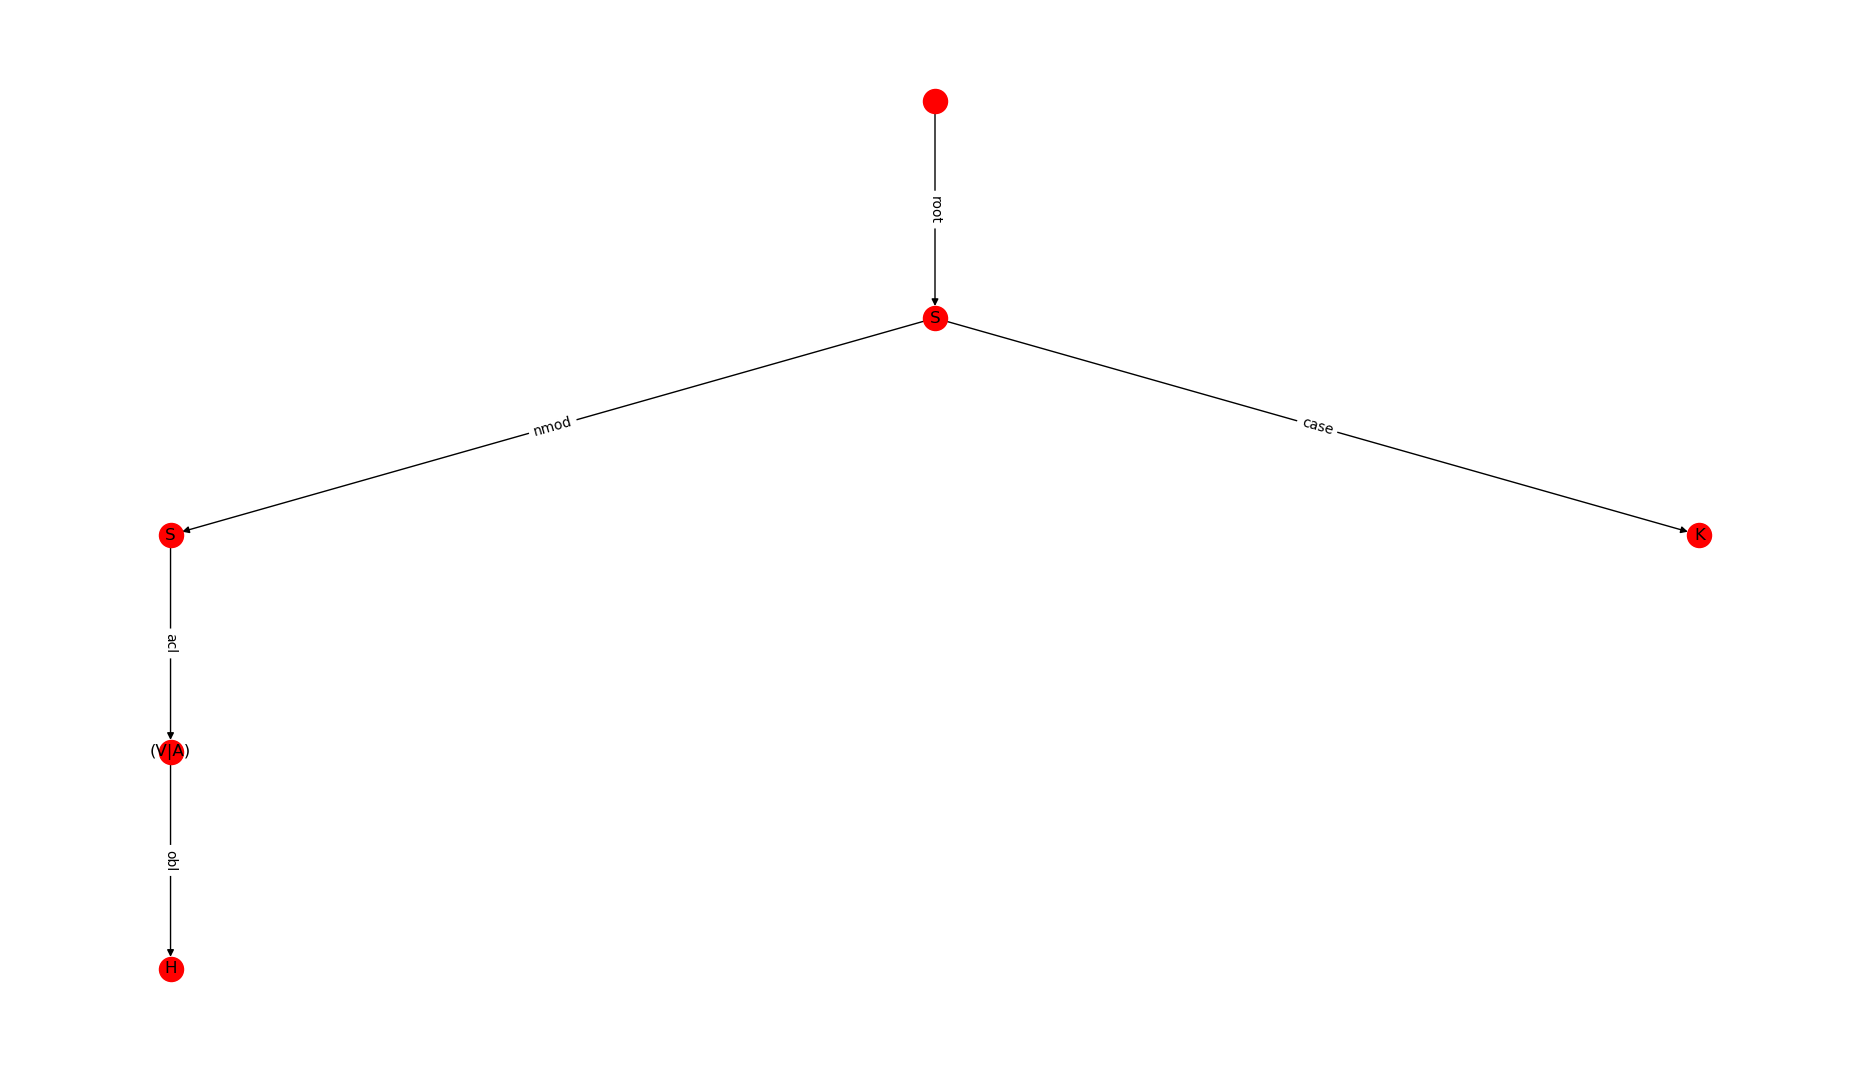

<Figure size 1850x1050 with 0 Axes>

In [16]:
draw_graph(test_graph, 'pos')

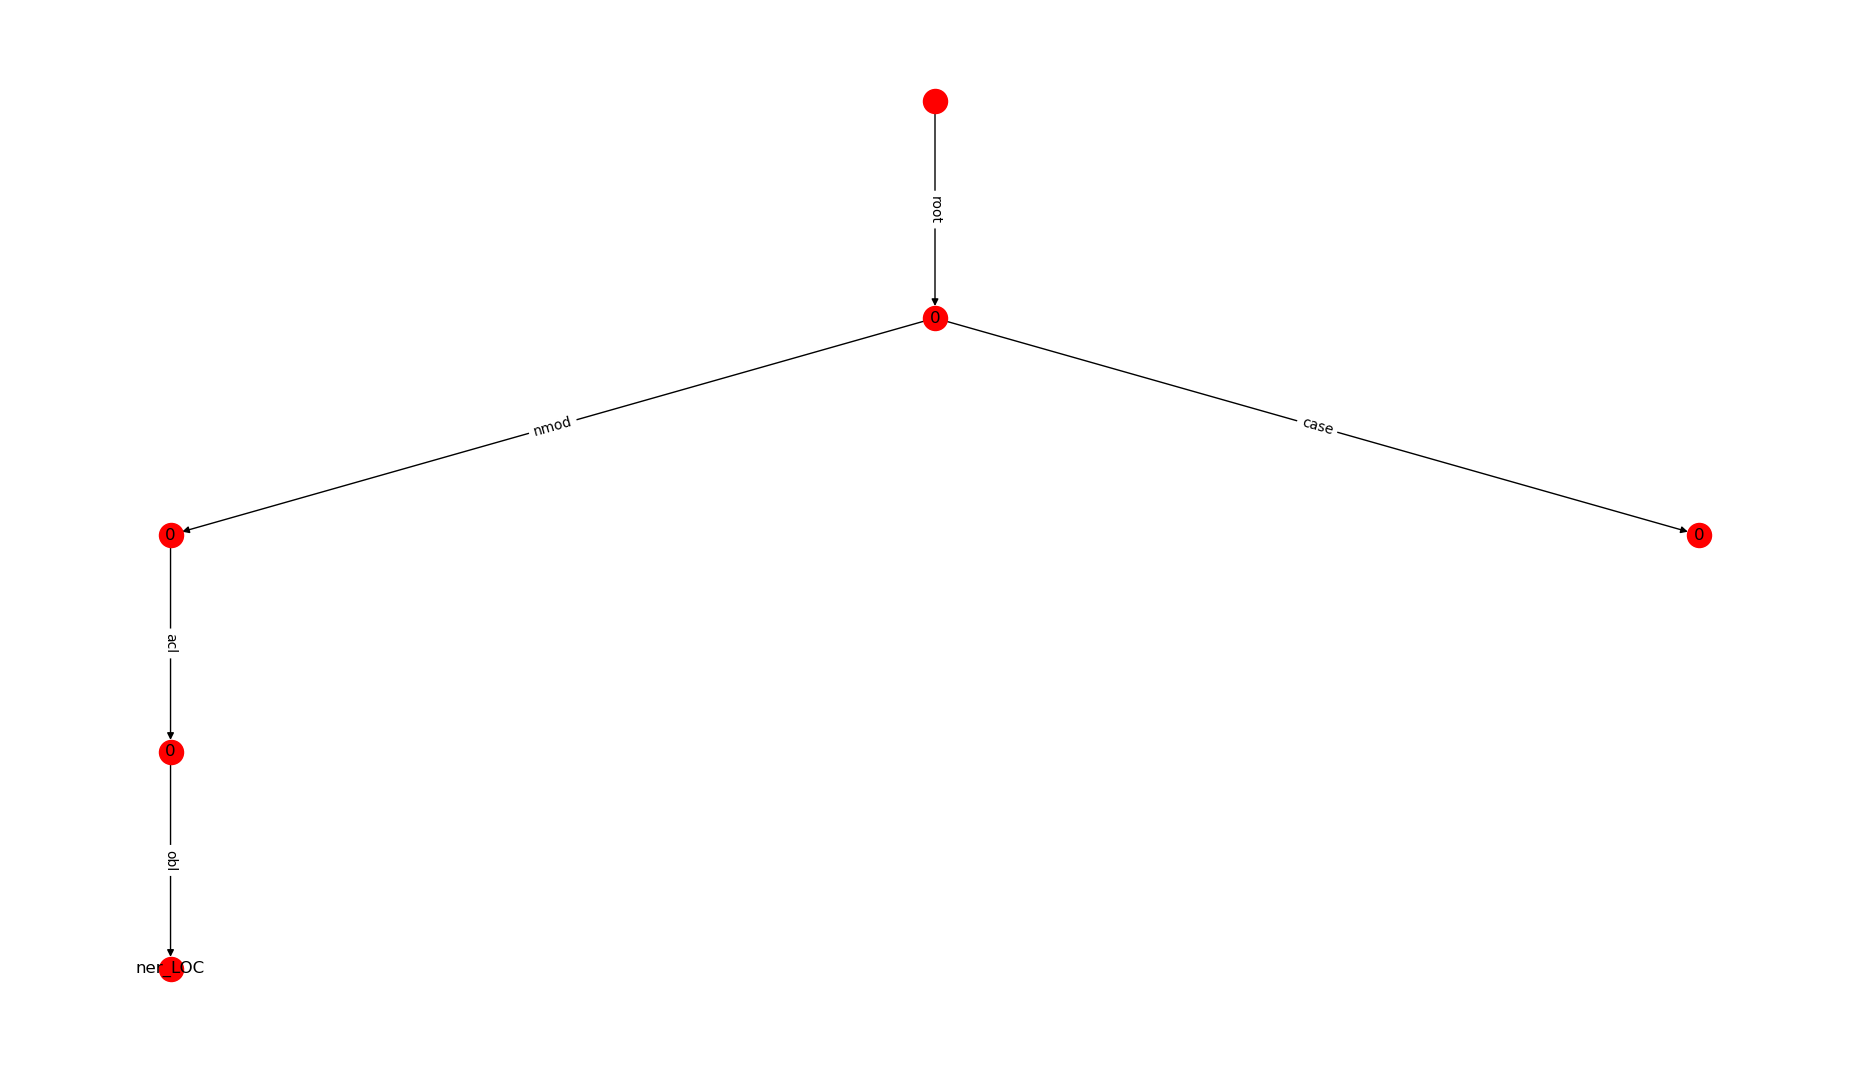

<Figure size 1850x1050 with 0 Axes>

In [17]:
draw_graph(test_graph, 'ner_timex')

Graafid ka DataFrame-i:

In [18]:
all_graphs = []
for phrase in df['phrase']:
    graph = create_graph(phrase)
    all_graphs.append(graph)
df.insert(len(df.columns), 'graph', all_graphs)

In [19]:
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S,"(1, 0, 2)"
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S,"(1, 2, 0)"
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K,"(1, 0, 2, 3, 4)"
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H,"(1, 0)"
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K,"(1, 2, 3, 4, 0, 5)"
...,...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)"
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z,"(1, 7, 2, 3, 4, 5, 6, 0, 8)"
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0,S-V-D-S-Z-Z-A-S-S-V-(V|A)-A-V-Z,"(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)"
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0,S-V-Y-S-(V|A)-S-Z-Z,"(1, 6, 2, 3, 4, 5, 0, 7, 8)"


Kas graaf on hashable?

In [20]:
df.duplicated(subset=['graph'], keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
835    False
836    False
837    False
838    False
839    False
Length: 840, dtype: bool

Kuna ei tulnud error, siis on hashable.

### DataFrame-i salvestamine

In [21]:
df.to_pickle("./noun_phrase_data.pkl") 

In [22]:
df = pd.read_pickle("./noun_phrase_data.pkl")
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S,"(1, 0, 2)"
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S,"(1, 2, 0)"
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K,"(1, 0, 2, 3, 4)"
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H,"(1, 0)"
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K,"(1, 2, 3, 4, 0, 5)"
...,...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)"
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z,"(1, 7, 2, 3, 4, 5, 6, 0, 8)"
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0,S-V-D-S-Z-Z-A-S-S-V-(V|A)-A-V-Z,"(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)"
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0,S-V-Y-S-(V|A)-S-Z-Z,"(1, 6, 2, 3, 4, 5, 0, 7, 8)"


### Histogramm fraasi pikkuste jagunemisest (sõnades)

In [29]:
# eri fraasitüüpide kohta eraldi histogrammid

In [30]:
all_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df))])

obl_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                               if df['phrase_type'][i]=='obl_phrase'])

nsubj_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='nsubj_phrase'])

nsubj_cop_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                     if df['phrase_type'][i]=='nsubj_cop_phrase'])

obj_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                               if df['phrase_type'][i]=='obj_phrase'])

xcomp_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='xcomp_phrase'])

nmod_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='nmod_phrase'])

appos_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='appos_phrase'])

parataxis_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='parataxis_phrase'])

root_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='root_phrase'])

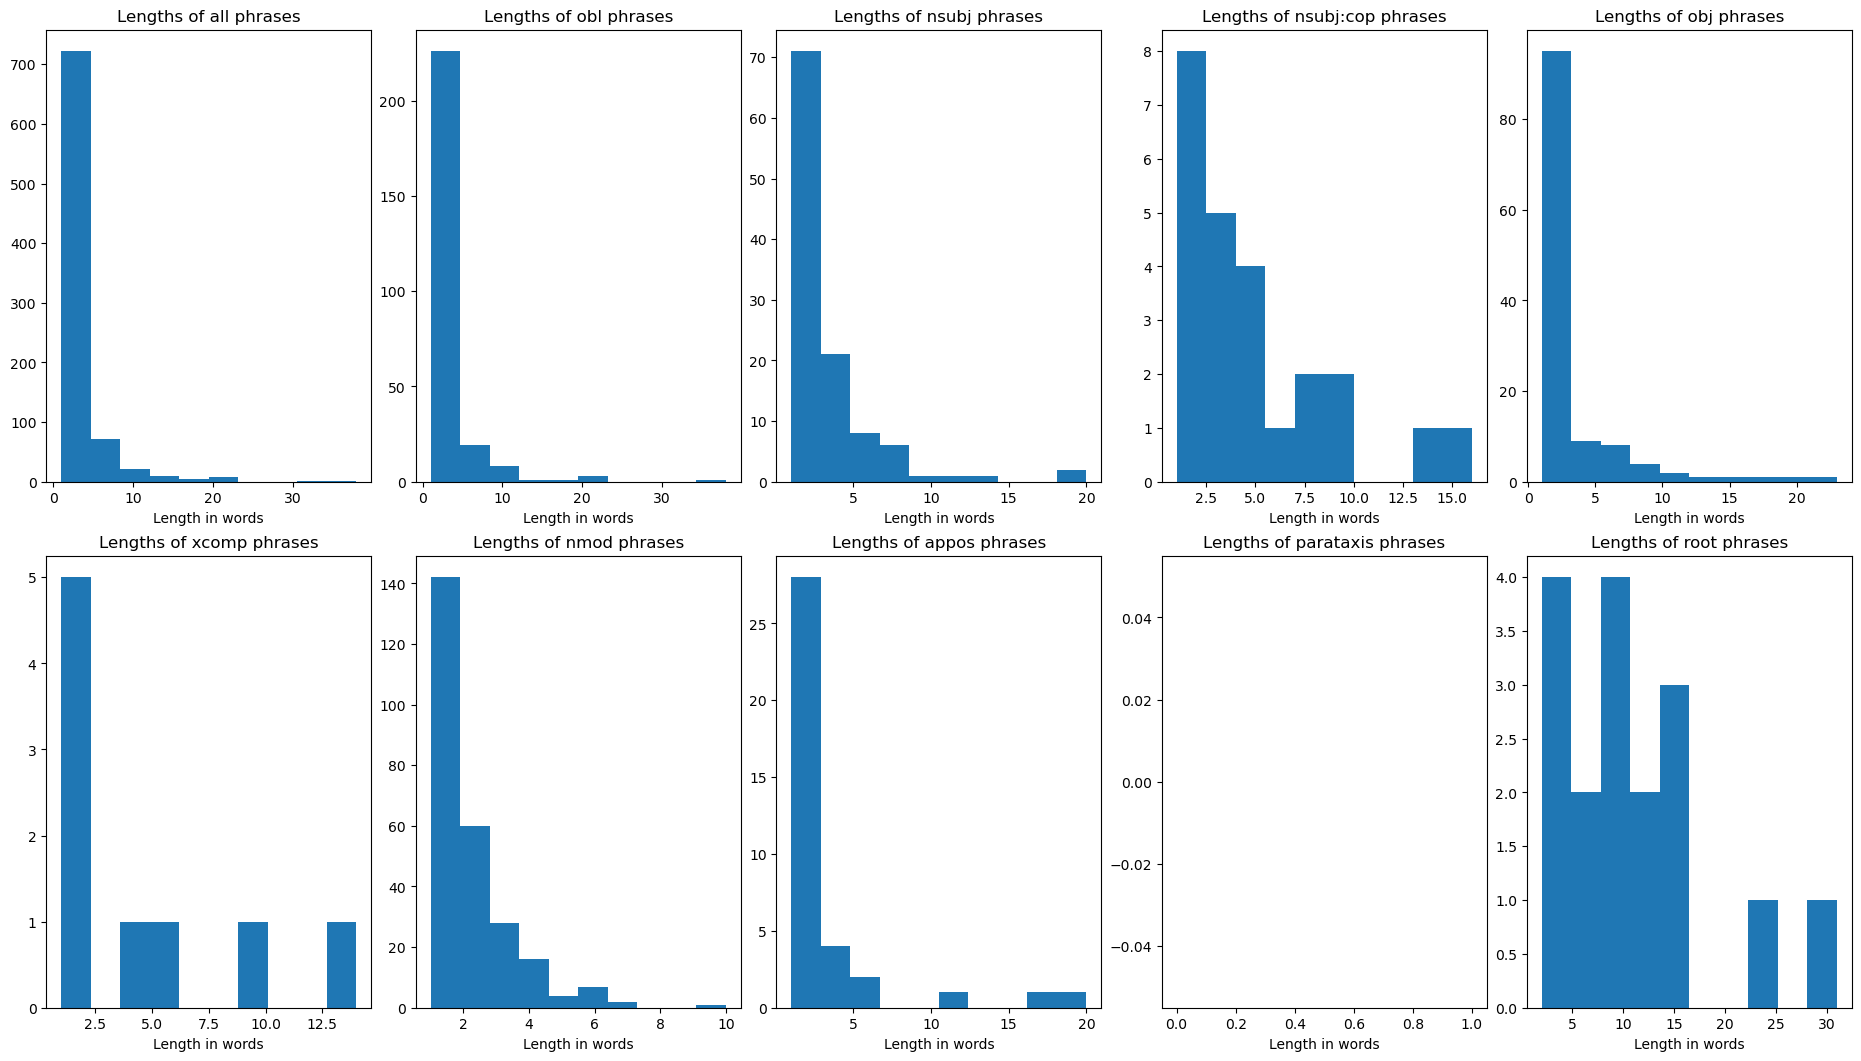

In [31]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, constrained_layout=True)
ax1.set_title('Lengths of all phrases')
ax1.set_xlabel('Length in words')
ax1.hist(all_phrase_lengths)
ax2.set_title('Lengths of obl phrases')
ax2.set_xlabel('Length in words')
ax2.hist(obl_phrase_lengths)
ax3.set_title('Lengths of nsubj phrases')
ax3.set_xlabel('Length in words')
ax3.hist(nsubj_phrase_lengths)
ax4.set_title('Lengths of nsubj:cop phrases')
ax4.set_xlabel('Length in words')
ax4.hist(nsubj_cop_phrase_lengths)
ax5.set_title('Lengths of obj phrases')
ax5.set_xlabel('Length in words')
ax5.hist(obj_phrase_lengths)
ax6.set_title('Lengths of xcomp phrases')
ax6.set_xlabel('Length in words')
ax6.hist(xcomp_phrase_lengths)
ax7.set_title('Lengths of nmod phrases')
ax7.set_xlabel('Length in words')
ax7.hist(nmod_phrase_lengths)
ax8.set_title('Lengths of appos phrases')
ax8.set_xlabel('Length in words')
ax8.hist(appos_phrase_lengths)
ax9.set_title('Lengths of parataxis phrases')
ax9.set_xlabel('Length in words')
ax9.hist(parataxis_phrase_lengths)
ax10.set_title('Lengths of root phrases')
ax10.set_xlabel('Length in words')
ax10.hist(root_phrase_lengths)
plt.show()

### Graph code ja groupby() graafidel

Graafe ei saa otse võrrelda ega grupeerida. Seetõttu loome sõne kujul graafi koodi.

In [23]:
test_graph = df['graph'][2]

In [24]:
get_graph_code(test_graph)

'((0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))'

In [25]:
get_graph_code(test_graph, ['pos'])

'(S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))'

In [26]:
get_graph_code(test_graph, ['pos', 'ner_timex'])

'(0-0-0-0,S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))'

Tehakse uued tulbad, eri tüüpi koodide jaoks. Nende järgi toimubki hiljem grupeerimine.

In [27]:
df['graph_code'] = [get_graph_code(graph) for graph in df['graph']]

In [28]:
df['graph_code_pos'] = [get_graph_code(graph, ['pos']) for graph in df['graph']]

In [29]:
df['graph_code_pos_ner_timex'] = [get_graph_code(graph, ['pos', 'ner_timex']) for graph in df['graph']]

In [30]:
df.to_pickle("./noun_phrase_data.pkl") 

In [31]:
df = pd.read_pickle("./noun_phrase_data.pkl")
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S,"(1, 0, 2)","((0, 1, root),(1, 2, nmod))","(S-S,(0, 1, root),(1, 2, nmod))","(0-0,S-S,(0, 1, root),(1, 2, nmod))"
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K,"(1, 0, 2, 3, 4)","((0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))","(S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))","(0-0-0-0,S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))"
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H,"(1, 0)","((0, 1, root))","(H,(0, 1, root))","(0,H,(0, 1, root))"
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K,"(1, 2, 3, 4, 0, 5)","((0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case))","(S-H-(V|A)-S-K,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case))","(0-ner_LOC-0-0-0,S-H-(V|A)-S-K,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case))"
...,...,...,...,...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","((0, 1, root),(1, 2, cop),(1, 3, advmod),(1, 6, nsubj:cop),(1, 12, parataxis),(1, 31, punct),(5, 4, nmod),(6, 5, nmod),(6, 7, nmod),(7, 8, appos),(8, 9, flat),(12, 10, punct),(12, 11, punct),(12, 13, obj),(12, 15, obl),(12, 16, obl),(12, 18, obj),(12, 20, conj),(12, 24, conj),(12, 26, conj),(12, 30, conj),(15, 14, nmod),(18, 17, nummod),(20, 19, punct),(20, 22, orphan),(22, 21, nummod),(24, 23, punct),(26, 25, nummod),(30, 27, cc),(30, 28, nmod),(30, 29, nummod))","(S-V-D-S-V-Z-S-S-S-Y-N-Z-Z-S-S-S-Y-S-S-Y-S-S-N-Z-Y-N-Z-N-J-S-N,(0, 1, root),(1, 2, cop),(1, 3, advmod),(1, 6, nsubj:cop),(1, 12, parataxis),(1, 31, punct),(5, 4, nmod),(6, 5, nmod),(6, 7, nmod),(7, 8, appos),(8, 9, flat),(12, 10, punct),(12, 11, punct),(12, 13, obj),(12, 15, obl),(12, 16, obl),(12, 18, obj),(12, 20, conj),(12, 24, conj),(12, 26, conj),(12, 30, conj),(15, 14, nmod),(18, 17, nummod),(20, 19, punct),(20, 22, orphan),(22, 21, nummod),(24, 23, punct),(26, 25, nummod),(30, 27, cc),(30, 28, nmod),(30, 29, nummod))","(0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-V-D-S-V-Z-S-S-S-Y-N-Z-Z-S-S-S-Y-S-S-Y-S-S-N-Z-Y-N-Z-N-J-S-N,(0, 1, root),(1, 2, cop),(1, 3, advmod),(1, 6, nsubj:cop),(1, 12, parataxis),(1, 31, punct),(5, 4, nmod),(6, 5, nmod),(6, 7, nmod),(7, 8, appos),(8, 9, flat),(12, 10, punct),(12, 11, punct),(12, 13, obj),(12, 15, obl),(12, 16, obl),(12, 18, obj),(12, 20, conj),(12, 24, conj),(12, 26, conj),(12, 30, conj),(15, 14, nmod),(18, 17, nummod),(20, 19, punct),(20, 22, orphan),(22, 21, nummod),(24, 23, punct),(26, 25, nummod),(30, 27, cc),(30, 28, nmod),(30, 29, nummod))"
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z,"(1, 7, 2, 3, 4, 5, 6, 0, 8)","((0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))","(S-P-P-H-H-Z-V-Z,(0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))","(0-0-0-ner_ORG-ner_ORG-0-0-0,S-P-P-H-H-Z-V-Z,(0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))"
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks

Grupeerides ainult ID-de alusel:

In [32]:
# grupeerides ainul ID-de ja deprel-atribuutide alusel
grouped_df2 = df.groupby('graph_code')

In [33]:
grouped_df2.describe()

phrase  \
                                                                                                                                                                                                                                                                                                                                             count   
graph_code                                                                                                                                                                                                                                                                                                                                           
((0, 1, root))                                                                                                                                                                                                                                                                                                                                 342   
((0, 1, root),(1, 10, acl),(6, 8, conj),(8, 7, cc),(9, 6, acl),(10, 2, punct),(10, 3, mark),(10, 4, obj),(10, 5, aux),(10, 9, obj))                                                                                                                                                                                                              1   
((0, 1, root),(1, 13, acl:relcl),(3, 4, case),(5, 6, flat),(7, 5, nmod),(7, 8, case),(9, 3, obl),(9, 7, obl),(10, 11, flat),(12, 9, acl),(12, 10, nmod),(13, 2, punct),(13, 12, obj),(13, 15, obl),(13, 16, obl),(13, 17, obl),(13, 21, conj),(15, 14, nmod),(21, 18, cc),(21, 19, advmod),(21, 20, advmod),(21, 22, punct),(21, 23, nmod))      1   
((0, 1, root),(1, 2, acl),(2, 3, compound:prt),(2, 5, obj),(5, 4, nmod))                                                                                                                                                                                                                                                                         1   
((0, 1, root),(1, 2, acl),(2, 5, obl),(2, 7, obl),(4, 3, nmod),(5, 4, nmod),(7, 6, nmod),(7, 10, conj),(7, 12, conj),(7, 14, conj),(10, 8, punct),(10, 9, nmod),(12, 11, punct),(14, 13, cc))                                                                                                                                                    1   
...                                                                                                                                                                                                                                                                                                                                            ...   
((0, 7, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case),(6, 4, obl),(7, 6, acl))                                                                                                                                                                                                                                                         1   
((0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))                                                                                                                                                                                                                                   1   
((0, 8, root),(2, 1, advmod),(5, 4, compound),(6, 5, nummod),(7, 3, punct),(7, 6, obl),(8, 2, amod),(8, 7, amod))                                                                                                                                                                                                                                1   
((0, 8, root),(2, 1, nmod),(2, 6, parataxis),(6, 3, punct),(6, 4, nmod),(6, 5, nmod),(6, 7, punct),(8, 2, nmod),(8, 9, case))                                                                                                       

Grupeerides ID-de ja POS-järjestuste alusel:

In [34]:
# grupeerides ID-de ja POS-järjestuste alusel
grouped_df3 = df.groupby('graph_code_pos')

In [35]:
grouped_df3.describe()

phrase  \
                                                                                                                                                                                     count   
graph_code_pos                                                                                                                                                                               
((V|A)-H-S-H-S-S-K,(0, 2, root),(2, 1, obl),(2, 6, nmod),(4, 3, nmod),(5, 4, nmod),(6, 5, nmod),(6, 7, case))                                                                            1   
((V|A)-H-S-S-Y-H-H-H-J-H,(0, 2, root),(2, 1, obl),(2, 5, obl),(3, 4, flat),(5, 3, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, cc),(9, 10, flat))                                1   
(A,(0, 1, root))                                                                                                                                                                         2   
(D-P-K,(0, 3, root),(1, 2, case),(3, 1, obl))                                                                                                                                            1   
(D-Z-Z,(0, 2, root),(2, 1, punct),(2, 3, punct))                                                                                                                                         1   
...                                                                                                                                                                                    ...   
(Y-N-V-Z-P-S-H-H-Z-H-Z,(0, 1, root),(1, 2, nummod),(1, 5, acl:relcl),(5, 3, punct),(5, 4, nsubj),(5, 6, obl),(5, 7, obl),(7, 9, appos),(9, 8, punct),(9, 11, flat),(11, 10, punct))      1   
(Y-O,(0, 1, root),(1, 2, flat))                                                                                                                                                          1   
(Y-S,(0, 1, root),(1, 2, flat))                                                                                                                                                          1   
(Y-S,(0, 2, root),(2, 1, nmod))                                                                                                                                                          1   
(Y-Y,(0, 1, root),(1, 2, flat))                                                                                                                                                          1   

                                                                                                                                                                                            \
                                                                                                                                                                                    unique   
graph_code_pos                                                                                                                                                                               
((V|A)-H-S-H-S-S-K,(0, 2, root),(2, 1, obl),(2, 6, nmod),(4, 3, nmod),(5, 4, nmod),(6, 5, nmod),(6, 7, case))                                                                            1   
((V|A)-H-S-S-Y-H-H-H-J-H,(0, 2, root),(2, 1, obl),(2, 5, obl),(3, 4, flat),(5, 3, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, cc),(9, 10, flat))                                1   
(A,(0, 1, root))                                                                                                                                                                         2   
(D-P-K,(0, 3, root),(1, 2, case),(3, 1, obl))                                                                                                                                            1   
(D-Z-Z,(0, 2, root),(2, 1, punct),(2, 3, punct))                                                                                                                                         1   

Grupeerides ID-de, POS-järjestuste ja ner/timex entiteetide alusel:

In [36]:
# grupeerides ID-de, POS-järjestuste ja ner/timex entiteetide alusel
grouped_df4 = df.groupby('graph_code_pos_ner_timex')

In [37]:
grouped_df4.describe()

phrase  \
                                                                                                                                                                                                                                                                                                                                                                                                                count   
graph_code_pos_ner_timex                                                                                                                                                                                                                                                                                                                                                                                                
(0,A,(0, 1, root))                                                                                                                                                                                                                                                                                                                                                                                                  2   
(0,G,(0, 1, root))                                                                                                                                                                                                                                                                                                                                                                                                  4   
(0,H,(0, 1, root))                                                                                                                                                                                                                                                                                                                                                                                                107   
(0,K,(0, 1, root))                                                                                                                                                                                                                                                                                                                                                                                                  2   
(0,N,(0, 1, root))                                                                                                                                                                                                                                                                                                                                                                                                  1   
...                                                                                                                                                                                                                                                                                                                                                                                                               ...   
(ner_PER-ner_PER-0-0-0,H-H-H-J-H,(0, 1, root),(1, 2, flat),(1, 4, conj),(4, 3, cc),(4, 5, flat))                                                                                                                                                                                                                                                                                                                    1   
(ner_PER-ner_PER-0-0-0,H-H-H-Z-J,(0, 1, root),(1, 3, conj),(1, 5, conj),(3, 2, punct),(5, 4, cc))                                                                                                                                                                                                                    

Grupid ja nende liikmed:

In [1]:
# grupeeritud ID-de ja ner/timex entiteetide alusel
#for name, group in grouped_df4:
#    display(name, group, len(group))